We are looking at how to estimate the monthly payment of a loan from the APR (Annual percentage rate), the amount borrowed, and the number of payback months. <br>
Let $P$ be the initial loan principle.<br>
Let $n$ be the number of payments to be made. (e.g. 5 years = 60 months=60 payments)<br>
Let $r$ be the $$\frac{\text{(fractional annual percentage rate)}}{12},$$ which is the monthly interest rate expressed as a fraction. e.g. 8% = .08/12.<br>

The usual and correct equation for the calculation of monthly payments is
$$M = \frac{P r (1+r)^n}{(1+r)^n-1}$$
The formula derivation is lengthy and even using it is a pain.<br><br>
An alternative, which is an approximation, but quite a good one, is $$Monthly Payment \approx \frac{P+\frac{1}{2}Pnr}{n}$$

<font size=3>
If there were no interest then the monthly payment would be $\frac{P}{n},$ the amount of the loan divided by the total number of monthly payments. But since there is interest to be paid, we can calculate it as simple interest, i.e. $$\text{Simple Interest}=(P)(r).$$ calculated over half of the loan period.
It is cut in half because as we make payments, the principle is decreased which of course also decreases the interest. I might do the calculation like this,
    
 $$\text{Monthly Payment}= \frac{P}{n}+\frac{P\left( \frac{APR}{12} \right)}{2}$$<br><br>
 Example: 
 Loan principle = P = 60,000 dollars<br>
 APR=8% = .08<br>
 $$\text{Monthly Payment}\approx \frac{60,000\text{ dollars}}{60\text{ months}}+\frac{60,000\left(\frac{.08}{12} \right)}{2}\approx1200 \text{ dollars/month}$$
 Whereas, doing the real calculation gets,
    $$M = \frac{P r (1+r)^n}{(1+r)^n-1}=1216.58 \text{ dollars/month}$$
 
 The calculation is always an underestimate.
   
 

In [17]:
P=[10_000,60_000,120_000,400_000]; APR=[.08,.08,.05,.04]; n=[2*12,5*12,10*12,30*12];M=[];A=[];Err=[]
for k in range(4):
    M.append(P[k]/n[k]+P[k]*(APR[k]/12)/2)
    A.append(P[k]*(APR[k]/12)*((APR[k]/12+1)**n[k])/((APR[k]/12+1)**n[k]-1))
    Err.append((A[k]-M[k])*100/P[k])
print("Principle   APR       Period    Estimated        Actual           %Error")
print("                     (months)   Payment/Mo.      Payment/Mo.")
for k in range(4):
    print(" ${0:6d}    {1:3.2f}      {2:3d}       ${3:7.2f}          ${4:7.2f}       {5:8.6f}%".format(P[k],APR[k],n[k],M[k],A[k],Err[k]))

# r=APR/12
# M=P*r*((r+1)**n)/((r+1)**n-1)
# print(M)

Principle   APR       Period    Estimated        Actual           %Error
                     (months)   Payment/Mo.      Payment/Mo.
 $ 10000    0.08       24       $ 450.00          $ 452.27       0.022729%
 $ 60000    0.08       60       $1200.00          $1216.58       0.027639%
 $120000    0.05      120       $1250.00          $1272.79       0.018988%
 $400000    0.04      360       $1777.78          $1909.66       0.032971%


869.8842908542201 866.6666666666667 869.4444444444445
my underestimate = 38.61149025064151


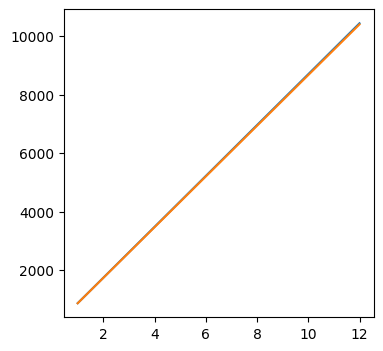

In [42]:
%reset -f
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

P = 10_000
r = 0.08/12
N = 1*12

t = (1 + r)**N
#C = r*t*P/(t - 1)
C=r*t*P/(t-1)
C1 = (P + 0.5*P*N*r)/N
#C1=P/N+P*r/2
C2 = (P + 0.5*P*(N+1)*r)/N
print(C, C1, C2)

def CostPerMonth(N,P,R): 
    #N=number of months of the load
    #R=Annual interest rate
    #P= principle owed
    t = (1 + r)**N
    C = r*t*P/(t - 1)
    return C

month=[]; total=[]; nbbtotal=[]
C = CostPerMonth(N,P,r)
APD=0; nbb=0;
for i in range(1,N+1):
    APD = APD+C
    nbb = nbb+C1
    
    month.append(i)
    total.append(APD)
    nbbtotal.append(nbb)

fig,ax=plt.subplots(figsize=(4,4))

plt.plot(month,total)
plt.plot(month,nbbtotal)
print('my underestimate =',total[N-1]-nbbtotal[N-1])

In [43]:
P=1
APR = .08
P=P+P*(APR)  #most simple concept. 1 term 
print(P)

#But pay every month. Then let N be the  number of periods
#and all of the periods in 1 year ('annual for APR')
P=1
for k in range(6):
    N=10**k; P=1
    r=APR/N
    for j in range(1,N+1):
        P=P+P*r
    print(N,P)
print("")

#The limit of continuous compounding
P=1
N=100
r=APR/N
P=P*(1+r)**N
print(N,P)

1.08
1 1.08
10 1.082942308472839
100 1.083252421519852
1000 1.0832836013467584
10000 1.0832867210250106
100000 1.0832870330097897

100 1.083252421519843


In the cell below I will demonstrate compound interest using simple math.<br>
$P$ is the loan principle.
$APR$ is the annual percentage rate of interest. 8% = 0.08$\quad$ 'as a fraction,'<br>
$r=\frac{APR}{12}$ is the monthly interest rate as a fraction.<br>
For example an APR of 8% translates as follows.
$$r=\frac{8\%}{12}=\frac{.08}{12}=\frac{8}{1200}=\frac{2}{300}=\frac{1}{150}$$
First we will find the simple interest paid on a 1 dollar investment with an APR.<br>
When there are no monthly payments, then the math is truly simple and at the end of a year we just pay out the $APR\times P.$<br> 
Suppose the loan amount is $10000$ at $8\%,$ then $$10000+10000\times .08=10800$$
However, when there is a monthly payment, we increase the
$$\begin{align}
r &= APR/12\\
\text{Value } &=P+Pr\\
\end{align}$$

In [42]:
P=10000; L=[]
APR=.08
r=APR/12
print('For 1 payment simple = ',P+P*APR)
N=12
for j in range(1,N+1):
    i=r*P
    P=P+P*r
    L.append([j,P,i])
print(*L,sep="\n")
#sum the interest payments
s=0
for j in range(N):
    s=s+L[j][2]
print('sum of monthly interest earned = ',s)

P=10_000
print('Calculation of interest earned over a year = ',P*(1+r)**N-P)

For 1 payment simple =  10800.0
[1, 10066.666666666666, 66.66666666666667]
[2, 10133.777777777777, 67.11111111111111]
[3, 10201.336296296296, 67.55851851851853]
[4, 10269.345204938272, 68.00890864197531]
[5, 10337.807506304527, 68.46230136625515]
[6, 10406.726223013224, 68.91871670869685]
[7, 10476.104397833313, 69.37817482008816]
[8, 10545.945093818867, 69.84069598555543]
[9, 10616.251394444327, 70.30630062545912]
[10, 10687.026403740623, 70.77500929629552]
[11, 10758.273246432227, 71.24684269160416]
[12, 10829.995068075108, 71.72182164288152]
sum of monthly interest earned =  829.9950680751074
Calculation of interest earned over a year =  829.9950680750972


<font size=3>
Now let's take the above and work it as a loan rather than an investment.
We first have to derive a monthly payment.<br>
Let $P$ be the loan amount.<br>
Let $APR$ be the fractional (0 to 1) annual percentage rate for interest.<br>
Let $r=APR/12$ be the monthly interest rate.<br>
Let $n$ be the number of payments at 1 payment per month.<br>
Let $M$ be the amount of each monthly payment.<br><br>

We want to find $M.$ The $\color{red}{relation}$ to be satisfied is that the sum of all montly payments, part of which is paid as prinicple and part as interest, will equal to zero after $n$ payments are made.<br><br>
    
In the first month we will pay some of the principle, $P,$ as well as the some of the interest. The interest amount paid in month one will be $r\cdot P.$ The principle is reduced every time a payment is made, therefore, the interest, calculated as $r\cdot P_n$ is also reduced each time.<br>
In month 1, the principle is $P_0=P.$ and we pay $(M-P_0\cdot r).$<br>
In month 2, the new principle is $P_1$ and it is $P_0-\text{(our payment}).$<br>
Month 2, the principle is $P_1=P_0-(M-P_0\cdot r).$<br>
Month 3, the principle is $P_2=P_1-(M-P_1\cdot r).$<br>
Month 4, the principle is $P_3=P_2-(M-P_2\cdot r). $<br><br>
But what is $M?\quad$
Looking at month 2, we do a wee bit of algebra to help the situation.<br>
$P_1=P_0(1+r)-M$ and all of them can be arranged accordingly.<br><br>
Month 2,  $P_1=P_0(1+r)-M$<br>
Month 3,  $P_2=P_1(1+r)-M$<br>
Month 4,  $P_3=P_2(1+r)-M$<br>
etc.<br><br>
For the purpose of working at a value for $M,$ let's suppose that there are only four payments. Then we can write the relation. Namely, the principle remaining after the $n^{th}$ payment will be zero.
$$0=P_3$$
Now we start back substituting.<br><br>
   $$0=P_2(1+r)-M$$
   $$0=( P_1(1+r)-M)(1+r)-M$$
   $$0=( (P_0(1+r)-M)(1+r)-M)(1+r)-M$$
until we arrive at an equation that has only $P_0,r,$ and $M,$ all values that we know. However, solving for $M$ is not trivial. <br>
For $(1-r)$ substitute $q.$  
    $$\begin{align}
    0&=( (P_0q-M)q-M)q-M\\
    0&=(P_0q^2-Mq-M)q-M\\
    0&=P_0q^3-Mq^2-Mq-M\\
    \end{align}$$
From here, I recognize the sum of a geometric series.<br>
<hr style="border-top: 1px solid green;">
Aside: Sum of a geometric series.<br>
    $$ \sigma = a+ar^1+ar^2+ar^3+\ldots +ar^{n-1} \tag{EQ 1}$$
    Multiply equation 1 by $r.$<br>
    $$ \sigma\cdot r = +ar^1+ar^2+ar^3+\ldots +ar^n \tag{EQ 1}$$
Subtract: (EQ 2) - (EQ 1)<br>
    $$\sigma\cdot r = -a + ar^n$$
Solve for $\sigma.$
    $$\begin{align}
    \sigma(r-1) &= -a+ar^n\\
    \sigma(1-r) &= a=ar^n \\
    \sigma &= \frac{a(1-r^n)}{1-r}
    \end{align}$$
<hr style="border-top: 1px solid green;">
The relation can be written as $$0=P_0q^3-\left( M+Mq+Mq^2  \right)$$
          <br><br>
Or, more generally, $$0=P_0 q^n -\left( M+Mq+Mq^2+Mq^3+\ldots +Mq^{n-1}\right)$$
Matching this to the geometric series, it is,
$$0=P_0q^n-\sigma = P_0q^n - \frac{M(1-q^n)}{1-q}$$
Now we need to change $q$ back to (r+1) and simplify the expression and solve for $M.$<br>
$$\begin{align}
0 &= P_0q^n - \frac{M(1-q^n)}{1-q}\\
P_0q^n &=\frac{M(1-q^n)}{1-q}\\
(1-q^n)M &= P_0q^n(1-q)\\
M &= \frac{P_0 q^n (1-q)}{1-q^n}\\
M &= \frac{P_0(1+r)^n(1-(1+r))}{1-(1+r)^n}\\
M &= \frac{-P_0\cdot r\cdot (1+r)^n}{1-(1+r)^n}\\
M &= \frac{P_0 r (1+r)^n}{(1+r)^n-1}
\end{align}$$

In [33]:
P=10000; L=[]
APR=.08
n=12
r=APR/n
M=P*r*((r+1)**n)/((r+1)**n-1) #the monthly payment
print(M)
for j in range(1,n+1):
    i=r*P
    P=P-(M-P*r)
    L.append([j,P,M-i,i])
print(*L,sep="\n")


869.8842908542201
[1, 9196.782375812447, 803.2176241875535, 66.66666666666667]
[2, 8388.209967463643, 808.5724083488038, 61.311882505416314]
[3, 7574.247076392514, 813.9628910711292, 55.921399783090955]
[4, 6754.857766047578, 819.3893103449367, 50.49498050928343]
[5, 5930.005860300342, 824.8519057472363, 45.03238510698385]
[6, 5099.654941848124, 830.3509184522178, 39.53337240200228]
[7, 4263.768350606224, 835.8865912418993, 33.99769961232083]
[8, 3422.3091820893787, 841.4591685168454, 28.425122337374827]
[9, 2575.240285782421, 847.0688963069576, 22.815394547262528]
[10, 1722.5242635000836, 852.7160222823373, 17.168268571882805]
[11, 864.1234677358641, 858.4007957642195, 11.483495090000558]
[12, -1.169837560155429e-10, 864.1234677359811, 5.760823118239094]


In [34]:
P=10_000
r=.08/12
M=P*r*((r+1)**12)/((r+1)**12-1)
print(M)

869.8842908542201
